# Plots for TikZ

In [1]:
import matplotlib.pyplot as plt
import tikzplotlib
import re
from pathlib import Path

from plotting import plot_averaged_training_charts, plot_comparison, make_axes, show_timestamp_info
import plotting
plotting.abbreviations['noise'] = r'NOISE'

figures_dir = Path("figures")
figures_dir.mkdir(exist_ok=True)

In [2]:
number_formats = {1e6: '10^6', 1e3: '10^3', 10.0: '10^1', 1.0: '1', 0.1: '0.1', 1e-2: '0.01'}

def modify_for_tikz(ax=None):
    """Hacks to make it more suitable for TikZ.
     - remove the title
     - remove sample sizes from legends
     - for legend labels, put the whole equation in LaTeX
    """
    if ax is None:
        ax = plt.gca()
    
    ax.grid(True, color="#e0e0e0")
    ax.set_title('')
    ax.set_ylabel('test accuracy')
    
    for child in ax.get_children():
        label = child.get_label()
        if not isinstance(label, str):
            continue
        if label in ["analog", "digital"]:
            child.set_label(r"\script size " + label)

        match = re.match(r"NOISE=([\de\.-]+) \((\d+) / (\d+)\)", label)
        if match:
            noise = float(match.group(1))
            analog_samples, digital_samples = match.group(2), match.group(3)
            print(f"noise = {noise}: {analog_samples} analog samples, {digital_samples} digital_samples")

            power = 1.0
            snr = power / noise
            new_label = r"\scriptsize $\mathsf{SNR} = " + number_formats[snr] + "$"
            child.set_label(new_label)

        match = re.match(r"(\w+) NOISE=([\de\.-]+) \((\d+)\)", label)
        if match:
            prefix = match.group(1)
            noise = float(match.group(2))
            samples = match.group(3)
            print(f"{prefix}, noise = {noise}: {samples} samples")
            
            power = 1.0
            snr = power / noise
            new_label = r"\scriptsize " + prefix + r", $\mathsf{SNR} = " + number_formats[snr] + "$"
            child.set_label(new_label)
    
    ax.legend()

In [3]:
common_specs = {
    'rounds':                 ('expect', 150),
    'batch_size':             ('expect', 64),
    'epochs':                 ('expect', 1),
    'ema_coefficient':        ('expect', 1 / 3),
    'save_squared_error':     ('expect', False),
    'send':                   ('expect', 'deltas'),
    'power':                  ('title',  1.0),
    'optimizer_client':       ('expect', 'sgd'),
    'clients':                ('title',  20),
    'noise':                  ('series', '__all__'),
    'lr_scheduler_client':    ('expect', 'none'),
}
base_analog_specs = common_specs.copy()
base_analog_specs.update({
    'script': 'dynpower.py',
    'power_update_period':    ('expect', 1),
    'power_quantile':         ('expect', 0.9),
    'power_factor':           ('expect', 0.9),
})
base_digital_specs = common_specs.copy()
base_digital_specs.update({
    'script': 'dynquant.py',
    'qrange_update_period':   ('expect', 1),
    'qrange_param_quantile':  ('expect', 0.9),
    'qrange_client_quantile': ('expect', 0.9),
    'channel_uses':           ('expect', None),
    'rounding_method':        ('expect', 'stochastic'),
    'parameter_schedule':     ('expect', 'staggered'),
    'zero_bits_strategy':     ('expect', 'read-zero'),
})

# Logistic regression

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 09:51:06** | 23 Aug 2021, 09:56:17 | 5 min 11 s |
| last to finish | 23 Aug 2021, 21:09:45 | **23 Aug 2021, 21:23:54** | 14 min 09 s |
| shortest | 23 Aug 2021, 12:23:18 | 23 Aug 2021, 12:28:17 | **4 min 59 s** |
| longest | 23 Aug 2021, 10:41:13 | 23 Aug 2021, 10:55:55 | **14 min 41 s** |


- Skipping 35 runs that don't match on 1 keys: clients (35)
- Skipping 24 runs that don't match on 1 keys: clients (24)
analog, noise = 1e-06: 18 samples
analog, noise = 0.1: 18 samples
digital, noise = 1e-06: 13 samples
digital, noise = 0.1: 13 samples


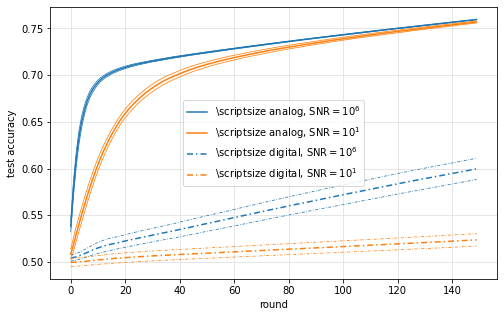

In [4]:
paths = ["results/20210823-epsilon-analog", "results/20210823-epsilon-digital"]
epsilon_specs = {
    'dataset':                ('title',  'epsilon'),
    'lr_client':              ('expect', 0.01),
    'momentum_client':        ('expect', 0.0),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', 20000),
    'clients':                ('title',  5),
}

analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(epsilon_specs)
digital_specs.update(epsilon_specs)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['confints'], both_legends=True)
modify_for_tikz()